In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
import sys
from tqdm import tqdm

from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

In [2]:
sys.path.append(r'C:\Users\dozie\Documents\Kaggle Competitions\Enefit\data\example_test_files')

In [3]:
%cd ../

c:\Users\dozie\Documents\Kaggle Competitions\Enefit


C:\Users\dozie\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
def get_date_components(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['date'] = df['datetime'].dt.date
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['day_of_year'] = df['datetime'].dt.day_of_year
    return df

In [5]:
train = pd.read_csv(r"./data/train.csv")
print(train.shape)
train = get_date_components(train)
train

(2018352, 9)


,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,date,year,month,day,day_of_year
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0,2021-09-01,2021,9,1,244
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0,2021-09-01,2021,9,1,244
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1,2021-09-01,2021,9,1,244
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1,2021-09-01,2021,9,1,244
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2,2021-09-01,2021,9,1,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64,2023-05-31,2023,5,31,151
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59,2023-05-31,2023,5,31,151
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59,2023-05-31,2023,5,31,151
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60,2023-05-31,2023,5,31,151


In [6]:
train['datetime'] = pd.to_datetime(train['datetime'])
train

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,date,year,month,day,day_of_year
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0,2021-09-01,2021,9,1,244
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0,2021-09-01,2021,9,1,244
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1,2021-09-01,2021,9,1,244
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1,2021-09-01,2021,9,1,244
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2,2021-09-01,2021,9,1,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64,2023-05-31,2023,5,31,151
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59,2023-05-31,2023,5,31,151
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59,2023-05-31,2023,5,31,151
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60,2023-05-31,2023,5,31,151


In [7]:
train[(train['datetime'] > '2023-05-28 20:00:00') & (train['datetime']<'2023-05-30 00:00:00')]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,date,year,month,day,day_of_year
2008602,0,0,1,18.385,0,2023-05-28 21:00:00,634,2008602,0,2023-05-28,2023,5,28,148
2008603,0,0,1,651.929,1,2023-05-28 21:00:00,634,2008603,0,2023-05-28,2023,5,28,148
2008604,0,0,2,0.038,0,2023-05-28 21:00:00,634,2008604,1,2023-05-28,2023,5,28,148
2008605,0,0,2,6.283,1,2023-05-28 21:00:00,634,2008605,1,2023-05-28,2023,5,28,148
2008606,0,0,3,125.588,0,2023-05-28 21:00:00,634,2008606,2,2023-05-28,2023,5,28,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012107,15,1,0,188.167,1,2023-05-29 23:00:00,635,2012107,64,2023-05-29,2023,5,29,149
2012108,15,1,1,0.000,0,2023-05-29 23:00:00,635,2012108,59,2023-05-29,2023,5,29,149
2012109,15,1,1,31.484,1,2023-05-29 23:00:00,635,2012109,59,2023-05-29,2023,5,29,149
2012110,15,1,3,0.000,0,2023-05-29 23:00:00,635,2012110,60,2023-05-29,2023,5,29,149


In [8]:
revealed_targets = pd.read_csv(r"./data/example_test_files/revealed_targets.csv")
revealed_targets['datetime'].value_counts().to_frame().sort_index()

,count
datetime,
2023-05-26 00:00:00,132
2023-05-26 01:00:00,132
2023-05-26 02:00:00,132
2023-05-26 03:00:00,132
2023-05-26 04:00:00,132
...,...
2023-05-29 19:00:00,130
2023-05-29 20:00:00,130
2023-05-29 21:00:00,130


CPU times: total: 62.5 ms
Wall time: 406 ms


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

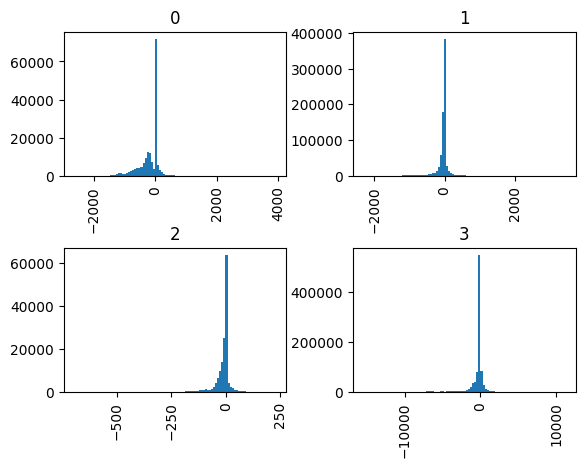

In [9]:
%%time

#change the target value to indicate if the user consumed more energy or produced more
is_consumption = {0: 1, 1:-1}

train['target_vector'] = train['is_consumption'].map(is_consumption)*train['target']
train['target_vector'].hist(by=train['product_type'], bins=100)

In [10]:
train[['county','target_vector']].groupby('county').sum()

,target_vector
county,
0,-1.458458e+08
1,-8.604856e+05
2,-1.142979e+07
3,-1.240031e+07
4,-1.511706e+07
5,-2.258676e+07
6,-2.519584e+06
7,-1.990631e+07
8,-3.013116e+06


In [11]:
y_train = train['target_vector']

In [12]:
client = pd.read_csv(r"./data/client.csv")
print(client.shape)
client.head()

(41919, 7)


,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2


In [13]:
weather = pd.read_csv(r"./data/historical_weather.csv")
print(weather.shape)
weather.head()

(1710802, 18)


,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0
1,2021-09-01 00:00:00,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,5.111111,359,0.0,0.0,0.0,57.6,22.2,1.0
2,2021-09-01 00:00:00,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,6.333333,355,0.0,0.0,0.0,57.6,22.7,1.0
3,2021-09-01 00:00:00,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0
4,2021-09-01 00:00:00,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,8.416667,5,0.0,0.0,0.0,57.6,23.7,1.0


In [14]:
forecast_weather = pd.read_csv(r'data/forecast_weather.csv')

In [15]:
def column_gradient(df, groupby_cols=[], grad_cols=[]):
    df_grad = df.groupby(groupby_cols)[grad_cols].agg(np.ptp)
    df_grad = df_grad.reset_index()
    df_grad.rename(columns={k: k+'_range' for k in grad_cols}, inplace=True)
    df = df.merge(df_grad, on=groupby_cols, how='left')
    return df

# new_client = column_gradient(client, ['product_type','is_business','county'], ['installed_capacity','eic_count'])
# new_client

In [16]:
weather_to_county_file = pd.read_csv(r"./data/weather_station_to_county_mapping.csv")
print(weather_to_county_file.shape)
weather_to_county_file.head()

(112, 4)


,county_name,longitude,latitude,county
0,NaN,21.7,57.6,NaN
1,NaN,21.7,57.9,NaN
2,NaN,21.7,58.2,NaN
3,NaN,21.7,58.5,NaN
4,NaN,21.7,58.8,NaN


In [17]:
from math import hypot

def dist(df, df_label):
    counties = []
    for index, row in tqdm(df.iterrows()):
        distance = float('inf')
        for index, loc_row in df_label.iterrows():
            new_distance = hypot(row['longitude']-loc_row['longitude'], row['latitude']-loc_row['latitude'])
            if new_distance<distance:
                nearest_county = loc_row['county']
                distance = new_distance
        counties.append(nearest_county)
    return counties


In [18]:
# weather_to_county_file.loc[weather_to_county_file['county'].isnull(), ['county']] = dist(weather_to_county_file.loc[weather_to_county_file['county'].isnull(), ['longitude','latitude']], 
#                                              weather_to_county_file.loc[weather_to_county_file['county'].notnull(), ['longitude','latitude','county']])
#weather_to_county_file.to_csv(r'data/geo_cordinates_to_county.csv', index=False)

In [19]:
from scipy.spatial.distance import cdist

d = cdist(weather_to_county_file.loc[weather_to_county_file['county'].notnull(), ['longitude','latitude']],
      weather[['longitude','latitude']], 'euclidean')
idx = np.argmin(d,axis=0)
print(idx)
weather['county'] = weather_to_county_file.loc[weather_to_county_file['county'].notnull(), 
                                               ['longitude','latitude','county']].reset_index().loc[idx,['county']].values
weather


[ 0  0  0 ... 45 48 48]


,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id,county
0,2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0,10.0
1,2021-09-01 00:00:00,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,5.111111,359,0.0,0.0,0.0,57.6,22.2,1.0,10.0
2,2021-09-01 00:00:00,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,6.333333,355,0.0,0.0,0.0,57.6,22.7,1.0,10.0
3,2021-09-01 00:00:00,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0,10.0
4,2021-09-01 00:00:00,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,8.416667,5,0.0,0.0,0.0,57.6,23.7,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710797,2023-05-30 10:00:00,11.7,4.6,0.0,0.0,1018.9,40,9,54,0,1.055556,253,567.0,392.0,175.0,59.7,26.2,637.0,5.0
1710798,2023-05-30 10:00:00,12.3,3.5,0.0,0.0,1019.0,46,4,70,0,0.805556,263,581.0,407.0,174.0,59.7,26.7,637.0,5.0
1710799,2023-05-30 10:00:00,9.8,3.0,0.0,0.0,1019.2,41,4,62,0,1.972222,285,609.0,432.0,177.0,59.7,27.2,637.0,2.0
1710800,2023-05-30 10:00:00,11.7,1.6,0.0,0.0,1019.0,44,0,73,0,3.500000,307,658.0,521.0,137.0,59.7,27.7,637.0,2.0


In [20]:
d = cdist(weather_to_county_file.loc[weather_to_county_file['county'].notnull(), ['longitude','latitude']],
      forecast_weather[['longitude','latitude']], 'euclidean')
idx = np.argmin(d,axis=0)
print(idx)
forecast_weather['county'] = weather_to_county_file.loc[weather_to_county_file['county'].notnull(), 
                                               ['longitude','latitude','county']].reset_index().loc[idx,['county']].values

[ 0  0  0 ... 45 48 48]


In [21]:
forecast_weather['forecast_datetime'] = pd.to_datetime(forecast_weather['forecast_datetime'])
forecast_weather

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation,county
0,57.6,21.7,2021-08-31 23:00:00+00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 00:00:00+00:00,0.0,0.0,0.0,0.0,10.0
1,57.6,22.2,2021-08-31 23:00:00+00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 00:00:00+00:00,0.0,0.0,0.0,0.0,10.0
2,57.6,22.7,2021-08-31 23:00:00+00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 00:00:00+00:00,0.0,0.0,0.0,0.0,10.0
3,57.6,23.2,2021-08-31 23:00:00+00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 00:00:00+00:00,0.0,0.0,0.0,0.0,10.0
4,57.6,23.7,2021-08-31 23:00:00+00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 00:00:00+00:00,0.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424507,59.7,26.2,2023-05-29 23:00:00+00:00,48,10.150049,5.662744,0.061066,0.257339,0.004059,0.308594,6.890626,-3.258144,637,2023-05-31 23:00:00+00:00,0.0,0.0,0.0,0.0,5.0
3424508,59.7,26.7,2023-05-29 23:00:00+00:00,48,10.259790,5.922754,0.107880,0.895203,0.198700,0.906036,6.890626,-3.768032,637,2023-05-31 23:00:00+00:00,0.0,0.0,0.0,0.0,5.0
3424509,59.7,27.2,2023-05-29 23:00:00+00:00,48,10.467798,6.072534,0.000000,0.387466,0.448853,0.530518,6.214112,-4.700405,637,2023-05-31 23:00:00+00:00,0.0,0.0,0.0,0.0,2.0
3424510,59.7,27.7,2023-05-29 23:00:00+00:00,48,10.694116,7.009058,0.000000,0.505936,0.997314,0.997498,5.810060,-4.338345,637,2023-05-31 23:00:00+00:00,0.0,0.0,0.0,0.0,2.0


In [22]:
forecast_weather.groupby(['county',forecast_weather['forecast_datetime'].
                              dt.to_period('h')])[list(forecast_weather.drop(['county',
                                                                              'forecast_datetime','origin_datetime'], axis= 1)
                                                       .columns)].agg('mean').reset_index()

C:\Users\dozie\AppData\Local\Temp\ipykernel_10152\1499556887.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dt.to_period('h')])[list(forecast_weather.drop(['county',


,county,forecast_datetime,latitude,longitude,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,0.0,2021-09-01 00:00,59.481818,24.790909,1.0,13.210818,10.267669,0.200584,0.032274,0.010144,0.223595,2.684896,-5.140117,1.0,0.000000,0.000000,0.0,0.000000
1,0.0,2021-09-01 01:00,59.481818,24.790909,2.0,12.522385,10.354051,0.048302,0.030348,0.039903,0.099754,2.896494,-4.729574,1.0,0.000000,0.000000,0.0,0.000000
2,0.0,2021-09-01 02:00,59.481818,24.790909,3.0,12.275615,10.341244,0.000000,0.111445,0.157095,0.215376,3.073118,-5.020347,1.0,0.000000,0.000000,0.0,0.000000
3,0.0,2021-09-01 03:00,59.481818,24.790909,4.0,12.431465,10.289575,0.000000,0.215554,0.221531,0.355869,2.852080,-5.378013,1.0,65.524040,9.926062,0.0,0.000002
4,0.0,2021-09-01 04:00,59.481818,24.790909,5.0,13.029088,10.249259,0.000000,0.210138,0.124796,0.264826,2.776397,-5.574651,1.0,244.516214,77.132643,0.0,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229675,15.0,2023-05-31 19:00,57.840000,27.550000,44.0,13.330811,7.376147,0.014819,0.045401,0.095229,0.115973,3.683825,-0.084474,637.0,0.000000,0.000000,0.0,0.000000
229676,15.0,2023-05-31 20:00,57.840000,27.550000,45.0,12.249084,7.326807,0.227545,0.050476,0.041637,0.290076,3.525840,-0.266987,637.0,-0.136000,0.000000,0.0,0.000000
229677,15.0,2023-05-31 21:00,57.840000,27.550000,46.0,11.276416,6.657813,0.645142,0.020522,0.012813,0.658936,3.446276,-0.426904,637.0,0.000000,0.000000,0.0,0.000000
229678,15.0,2023-05-31 22:00,57.840000,27.550000,47.0,10.385510,5.790234,0.683197,0.007771,0.003964,0.689355,3.563252,-0.442571,637.0,0.000000,0.000000,0.0,0.000000


In [33]:
np.min(weather['data_block_id'].unique())

1.0

In [ ]:
class FeaturePostProcessing():
    def __init__(self):
        self.client_join = ['product_type', 'is_business', 'county']
        self.weather_join = ['datetime', 'county', 'data_block_id']
        self.weather_stats_cols = ['temperature','shortwave_radiation',
                                   'direct_solar_radiation','diffuse_radiation']
        self.stat_params = ['min', 'max', 'mean', 'std']
        self.county_target_cols = ['county','product_type','is_business','is_consumption','target']
        self.datetime_cols = ['month','day','hour']

    def get_date_components(self, df):
        df['datetime'] = pd.to_datetime(df['datetime'])
        df['date'] = df['datetime'].dt.date
        df['year'] = df['datetime'].dt.year
        df['month'] = df['datetime'].dt.month
        df['day'] = df['datetime'].dt.day
        df['day_of_year'] = df['datetime'].dt.day_of_year
        df['hour'] = df['datetime'].dt.hour
        return df
        
    # Compute range of fields in dataframe
    def column_range(self, df, groupby_cols=[], grad_cols=[]):
        df_grad = df.groupby(groupby_cols)[grad_cols].agg(np.ptp)
        df_grad = df_grad.rename_axis(groupby_cols).reset_index()
        df_grad.rename(columns={k: k+'_range' for k in grad_cols}, inplace=True)
        #df = df.merge(df_grad, on=groupby_cols, how='left')
        return df_grad
    
    # Calculate statistics parameters 
    def data_stats(self, df, attrs, groupby_cols=None):
        if 'datetime' in list(df.columns):
            sorted_date = sorted(df['datetime'].unique())
        elif 'date' in list(df.columns):
            sorted_date = sorted(df['date'].unique())
        
        data_stats = df.groupby(groupby_cols).agg({attr : self.stat_params for attr in attrs})
        data_stats = data_stats.reset_index()
        data_stats.columns = [' '.join(col).strip() for col in data_stats.columns.values]
        return data_stats        
    
    def __call__(self, client_data, weather_data, train_data):
        self.client_data = client_data.copy()
        self.weather_data = weather_data.copy()
        self.train_data = train_data.copy()
        
        # Calculate stats on client data
        self.client_stats = self.column_range(self.client_data, ['product_type','is_business','county'], ['installed_capacity','eic_count'])
        self.client_stats = self.client_stats.merge(
                                self.data_stats(self.client_data, ['installed_capacity', 'eic_count'], groupby_cols=['product_type','county','is_business']),
                                on=['product_type','is_business','county'], how='left')
        
        # Calculate weather stats for each county
        weather_data = self.get_date_components(self.weather_data)
        self.weather_range = self.column_range(self.weather_data[self.weather_stats_cols+['county']+self.datetime_cols], ['county']+self.datetime_cols, 
                                               list(set(self.weather_stats_cols)-set(self.datetime_cols)))
        self.weather_stats = self.weather_range.merge(
                                self.data_stats(self.weather_data[self.weather_stats_cols+['county']+self.datetime_cols], 
                                                list(set(self.weather_stats_cols)-set(self.datetime_cols)), ['county']+self.datetime_cols), 
                                on=['county']+self.datetime_cols, how='left')
        
        # Calculate target stats for each county
        train_data = self.get_date_components(self.train_data)
        self.county_target_stats = self.column_range(self.train_data[self.county_target_cols+self.datetime_cols], 
                                                     ['county','product_type','is_business']+self.datetime_cols, ['target'])
        self.county_target_stats = self.county_target_stats.merge(
                                        self.data_stats(self.train_data[self.county_target_cols+self.datetime_cols], ['target'], 
                                                        groupby_cols=['county','product_type','is_business','is_consumption']+self.datetime_cols),
                                        on=['county','product_type','is_business']+self.datetime_cols, how='left')
        
        # Merge all stats data
        self.train_data_stats = self.client_stats.merge(self.weather_stats, on=['county'], how='right')
        self.train_data_stats = self.train_data_stats.merge(self.county_target_stats, 
                                                            on=['county','product_type','is_business']+self.datetime_cols, how='left')

        return self.train_data_stats
        

In [ ]:
train_data_stats = FeaturePostProcessing()
train_data_stats = train_data_stats(client, weather, train)
train_data_stats

,product_type,is_business,county,installed_capacity_range,eic_count_range,installed_capacity min,installed_capacity max,installed_capacity mean,installed_capacity std,eic_count min,...,shortwave_radiation min,shortwave_radiation max,shortwave_radiation mean,shortwave_radiation std,target_range,is_consumption,target min,target max,target mean,target std
0,0,1,0,873.200,25,400.00,1273.200,720.758648,262.288768,5,...,0.0,0.0,0.0,0.0,963.275,0.0,0.000,0.000,0.0000,0.000000
1,0,1,0,873.200,25,400.00,1273.200,720.758648,262.288768,5,...,0.0,0.0,0.0,0.0,963.275,1.0,247.800,963.275,605.5375,505.917224
2,1,0,0,4297.815,439,952.89,5250.705,2936.666950,1296.350908,108,...,0.0,0.0,0.0,0.0,679.466,0.0,0.000,0.004,0.0020,0.002828
3,1,0,0,4297.815,439,952.89,5250.705,2936.666950,1296.350908,108,...,0.0,0.0,0.0,0.0,679.466,1.0,442.226,679.466,560.8460,167.754013
4,1,1,0,1489.600,56,1411.00,2900.600,2114.450314,502.502766,43,...,0.0,0.0,0.0,0.0,833.974,0.0,0.000,0.000,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178947,1,1,15,488.500,17,325.00,813.500,542.166667,139.195927,7,...,0.0,0.0,0.0,0.0,74.179,1.0,70.500,74.179,72.3395,2.601446
1178948,3,0,15,1117.550,100,918.20,2035.750,1191.064182,267.399824,61,...,0.0,0.0,0.0,0.0,166.531,0.0,0.000,3.118,1.5590,2.204759
1178949,3,0,15,1117.550,100,918.20,2035.750,1191.064182,267.399824,61,...,0.0,0.0,0.0,0.0,166.531,1.0,141.407,166.531,153.9690,17.765351
1178950,3,1,15,829.500,17,1358.70,2188.200,1696.301887,169.747737,38,...,0.0,0.0,0.0,0.0,371.824,0.0,0.000,0.000,0.0000,0.000000


In [ ]:
train_data_stats[(train_data_stats['product_type']==0) & (train_data_stats['is_business']==1) & (train_data_stats['county']==0)].iloc[:,25:]

,direct_solar_radiation max,direct_solar_radiation mean,direct_solar_radiation std,diffuse_radiation min,diffuse_radiation max,diffuse_radiation mean,diffuse_radiation std,shortwave_radiation min,shortwave_radiation max,shortwave_radiation mean,shortwave_radiation std,target_range,target min,target max,target mean,target std
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,963.275,0.0,963.275,302.76875,455.568473
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,952.127,0.0,952.127,298.51675,450.418986
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,944.033,0.0,944.033,298.22325,446.236551
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,950.747,0.0,950.747,299.14175,449.593959
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,947.294,0.0,947.294,297.23850,448.093210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1084.410,0.0,1084.410,299.02750,526.229403
61292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,973.760,0.0,973.760,275.94000,469.232353
61299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,951.530,0.0,951.530,266.08250,460.048401
61306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,907.200,0.0,907.200,255.17500,437.963837


In [ ]:
def prior_values_stat(df, attrs, cols=None):
    if 'datetime' in list(df.columns):
        sorted_date = sorted(df['datetime'].unique())
    elif 'date' in list(df.columns):
        sorted_date = sorted(df['date'].unique())
    
    stat_measures = ['min', 'max', 'mean', 'std']
    value_stats = pd.DataFrame()
    for loc,date in enumerate(sorted_date):
        data_window = df[df['date']<date][cols+attrs]
        data_window_stats = data_window.groupby(cols).agg({attr : stat_measures for attr in attrs})
        data_window_stats['date'] = date
        value_stats = pd.concat([value_stats, data_window_stats])
        #value_stats['date'].iloc[loc] = date
    value_stats = value_stats.reset_index()
    value_stats.columns = [' '.join(col).strip() for col in value_stats.columns.values]
    return value_stats

client_stats = prior_values_stat(client, ['installed_capacity', 'eic_count'], cols=['product_type','county','is_business'])

In [ ]:
client_stats

In [ ]:
def train_lag_data_by_group(df, target, groupby_cols,lag_days=10):    
    for i in range(1,lag_days+1):
        df_lag = df[groupby_cols+[target,'datetime']]
        #df_lag['datetime'] = df_lag['datetime'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S.%f'))
        df_lag = df_lag.sort_values(['datetime']).groupby(groupby_cols).shift(i)
        df_lag.drop(columns='datetime', inplace=True)
        if i==1:
            df_merged = df.join(df_lag.rename(columns=lambda x: x+f"_lag_{i}"))
        else:
            df_merged = df_merged.join(df_lag.rename(columns=lambda x: x+f"_lag_{i}"))
    #lagged_target = pd.concat([df[target].shift(), df[target].shift(2)], axis=1)
    return df_merged

df_lag = train_lag_data_by_group(train, 'target_vector', ['is_business','county','product_type','is_consumption'])

In [ ]:
def get_date_components(df):
    df['date'] = df['datetime'].dt.date
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['day_of_year'] = df['datetime'].dt.day_of_year
    df['hour'] = df['datetime'].dt.hour
    return df

df_lag = get_date_components(df_lag)

In [ ]:
df_lag

In [ ]:
client_stats

In [ ]:
test = pd.read_csv(r"./data/example_test_files/test.csv")
display(test)


In [ ]:
def test_lag_data_by_group(df_test, df_train, target, groupby_cols):
    test_row_id = 2005872

    df_test = df_test.rename(columns={'prediction_datetime': 'datetime'})
    df_test['datetime'] = pd.to_datetime(df_test['datetime'])
    df_train = df_train[df_train['datetime']<'2023-05-28 00:00:00']
    test_row_id = df_train['row_id'].idxmax()
    
    if 'target_vector' in df_test.columns.to_list():
        pass
    else:
        df_test['target_vector'] = np.NaN
    merge_train_test = pd.concat([df_train[groupby_cols+[target,'datetime','row_id']],
                                  df_test[groupby_cols+[target,'datetime','row_id']]]).reset_index()
    merge_train_test = train_lag_data_by_group(merge_train_test, target, groupby_cols)
    merge_train_test = merge_train_test.drop(columns=['index'])
    merge_train_test = merge_train_test.reset_index()
    merge_train_test = merge_train_test.loc[test_row_id+1:]
    return merge_train_test

test = test_lag_data_by_group(test, train, 'target_vector', ['is_business','county','product_type','is_consumption'])

In [ ]:
test

In [ ]:
train = df_lag
train

Drop columns and fill nas

In [ ]:
train = train.fillna(0)
train = train.drop(columns=['datetime','target','row_id','target_vector','prediction_unit_id','data_block_id'])

In [ ]:
train.shape

In [ ]:
test = test.fillna(0)
test = test.drop(columns=['datetime','row_id','index','target_vector'])


In [ ]:
display(train)
display(test)

In [ ]:
y_train = y_train.fillna(0)

Train Model

In [ ]:
regr = RandomForestRegressor(max_depth=3, random_state=0, verbose=2)
regr.fit(train, y_train)

In [ ]:
test_dummy = pd.read_csv(r"./data/example_test_files/test.csv")
test_dummy['target'] = np.abs(regr.predict(test))

In [ ]:
sample_submission = pd.read_csv(r"./data/example_test_files/sample_submission.csv")
sample_submission.drop(columns=['target'])

sample_submission = pd.merge(sample_submission, test_dummy[['row_id','target']], on='row_id', how='left')
sample_submission

In [ ]:
sample_submission.to_csv(r'./data/sample_submission.csv')

Run submission using API

In [ ]:
from data import public_timeseries_testing_util as enefit
env = enefit.make_env()
iter_test = env.iter_test()

In [ ]:
counter = 0
for (test, revealed_targets, client, historical_weather,
        forecast_weather, electricity_prices, gas_prices,sample_prediction) in iter_test:
    if counter == 0:
        print(test.head(3))
        print(revealed_targets.head(3))
        print(client.head(3))
        print(historical_weather.head(3))
        print(forecast_weather.head(3))
        print(electricity_prices.head(3))
        print(gas_prices.head(3))
        print(sample_prediction.head(3))
    sample_prediction['target'] = 0
    env.predict(sample_prediction)
    counter += 1